In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score, precision_score, recall_score, f1_score,
    precision_recall_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
import pandas as pd

# Load training features and target
X_train = pd.read_csv(r'C:\10x AIMastery\Credit-risk-model\data\processed\X_train.csv')
y_train = pd.read_csv(r'C:\10x AIMastery\Credit-risk-model\data\processed\y_train.csv')

# If y_train has a single column, convert it to a Series
if y_train.shape[1] == 1:
    y_train = y_train.iloc[:, 0]


In [8]:
# Load test features and labels (optional if you'll evaluate next)
X_test = pd.read_csv(r'C:\10x AIMastery\Credit-risk-model\data\processed\X_test.csv')
y_test = pd.read_csv(r'C:\10x AIMastery\Credit-risk-model\data\processed\y_test.csv')

# Convert y_test to Series if needed
if y_test.shape[1] == 1:
    y_test = y_test.iloc[:, 0]


In [9]:
# Train Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Train Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


🔍 Logistic Regression Evaluation
Accuracy: 0.9960800710813777
Precision: 0.6226415094339622
Recall: 0.375
F1 Score: 0.46808510638297873

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19045
           1       0.62      0.38      0.47        88

    accuracy                           1.00     19133
   macro avg       0.81      0.69      0.73     19133
weighted avg       1.00      1.00      1.00     19133



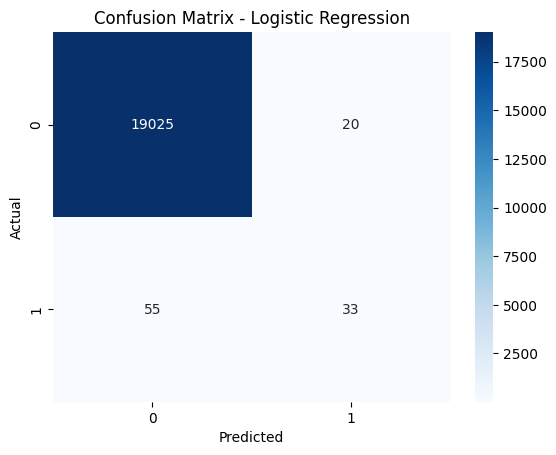

In [10]:
# Predict on test set
log_preds = log_reg.predict(X_test)

# Print metrics
print("🔍 Logistic Regression Evaluation")
print("Accuracy:", accuracy_score(y_test, log_preds))
print("Precision:", precision_score(y_test, log_preds))
print("Recall:", recall_score(y_test, log_preds))
print("F1 Score:", f1_score(y_test, log_preds))
print("\nClassification Report:\n", classification_report(y_test, log_preds))

# Confusion matrix
cm = confusion_matrix(y_test, log_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


🌲 Random Forest Evaluation
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19045
           1       1.00      1.00      1.00        88

    accuracy                           1.00     19133
   macro avg       1.00      1.00      1.00     19133
weighted avg       1.00      1.00      1.00     19133



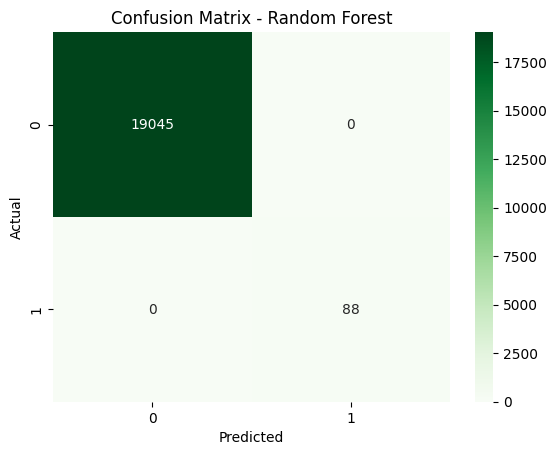

In [11]:
# Predict on test set
rf_preds = rf_clf.predict(X_test)

# Print metrics
print("🌲 Random Forest Evaluation")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Precision:", precision_score(y_test, rf_preds))
print("Recall:", recall_score(y_test, rf_preds))
print("F1 Score:", f1_score(y_test, rf_preds))
print("\nClassification Report:\n", classification_report(y_test, rf_preds))

# Confusion matrix
cm_rf = confusion_matrix(y_test, rf_preds)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [13]:
# Get predicted probabilities for class 1
rf_probs = rf_clf.predict_proba(X_test)[:, 1]
log_probs = log_reg.predict_proba(X_test)[:, 1]


In [14]:
# Random Forest ROC curve and AUC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Logistic Regression ROC curve and AUC
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
log_auc = roc_auc_score(y_test, log_probs)


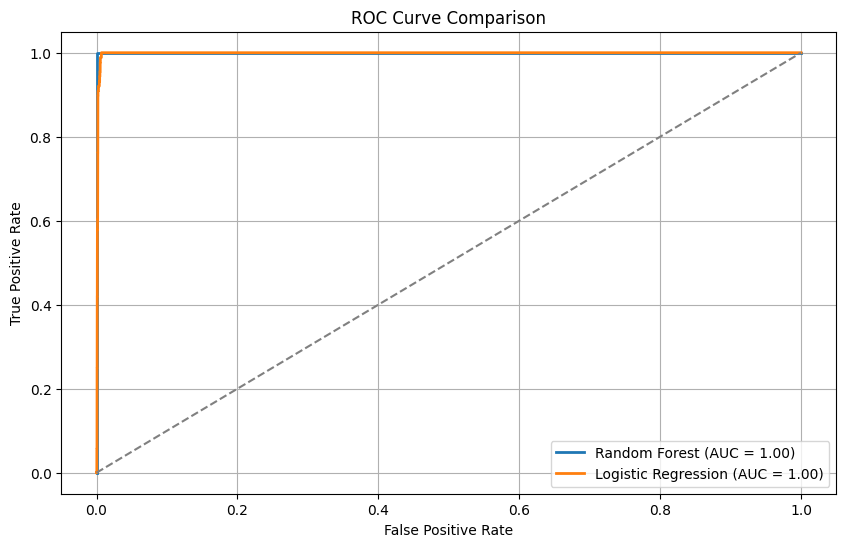

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', linewidth=2)
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression (AUC = {log_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # baseline
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


In [16]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


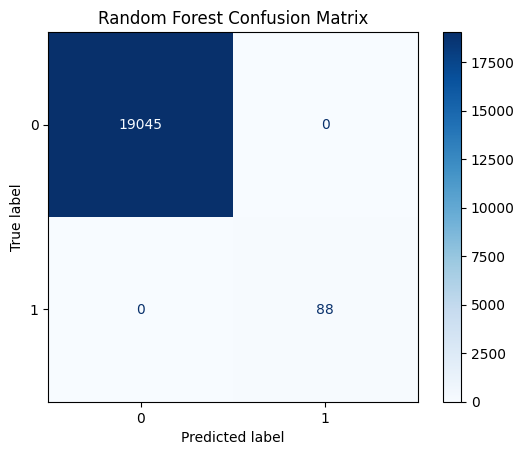

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions
y_pred = rf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.grid(False)
plt.show()


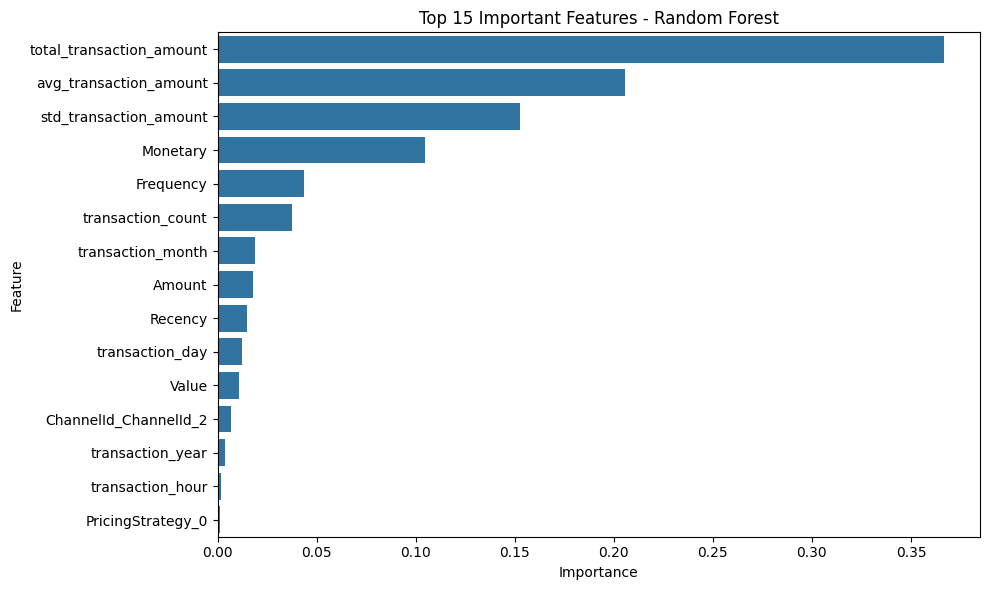

In [18]:
import pandas as pd
import seaborn as sns

# Get feature importances
importances = rf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort and visualize
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Important Features - Random Forest')
plt.tight_layout()
plt.show()


In [19]:
# Get feature importances
importances = rf.feature_importances_



In [20]:
# Convert to pandas Series for easy plotting
import pandas as pd

feature_names = X_train.columns  # Ensure this matches your training set columns
feature_importances = pd.Series(importances, index=feature_names)


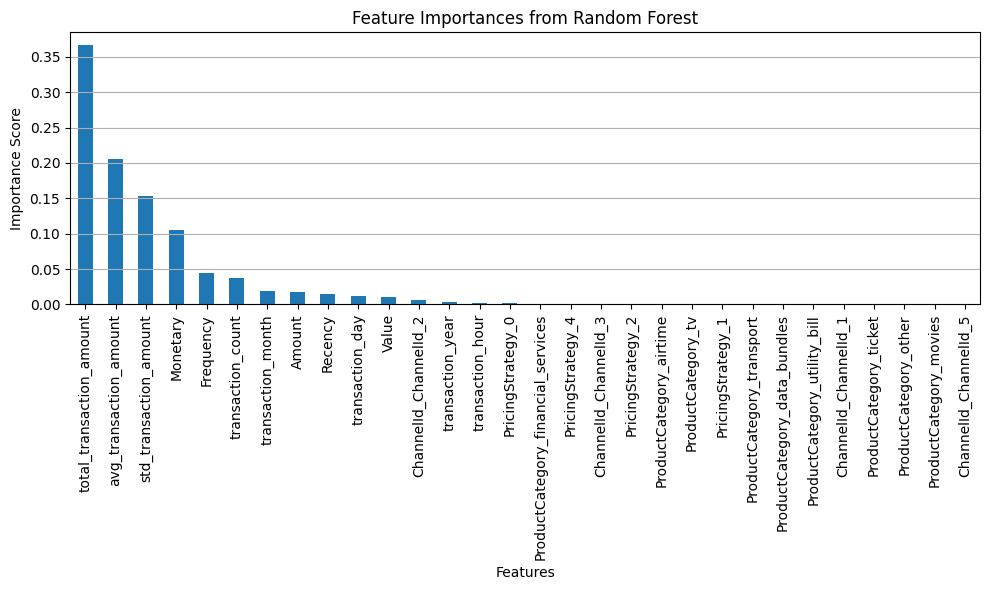

In [21]:
import matplotlib.pyplot as plt

# Sort importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title("Feature Importances from Random Forest")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [22]:
# Replace 'lr' with 'log_reg' and 'rf' with 'rf_clf' or your RF variable
y_scores_lr = log_reg.predict_proba(X_test)[:, 1]
y_scores_rf = rf_clf.predict_proba(X_test)[:, 1]


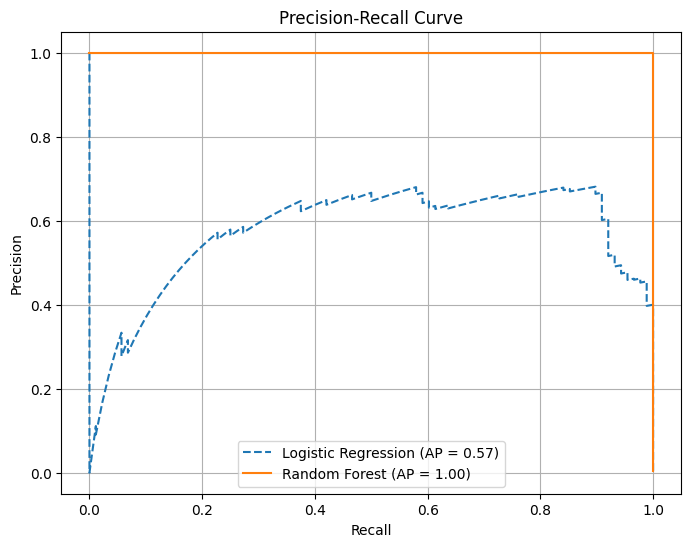

In [23]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get probabilities
y_scores_lr = log_reg.predict_proba(X_test)[:, 1]
y_scores_rf = rf_clf.predict_proba(X_test)[:, 1]

# Precision-Recall for Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_scores_lr)
ap_lr = average_precision_score(y_test, y_scores_lr)

# Precision-Recall for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_scores_rf)
ap_rf = average_precision_score(y_test, y_scores_rf)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AP = {ap_lr:.2f})', linestyle='--')
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP = {ap_rf:.2f})', linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


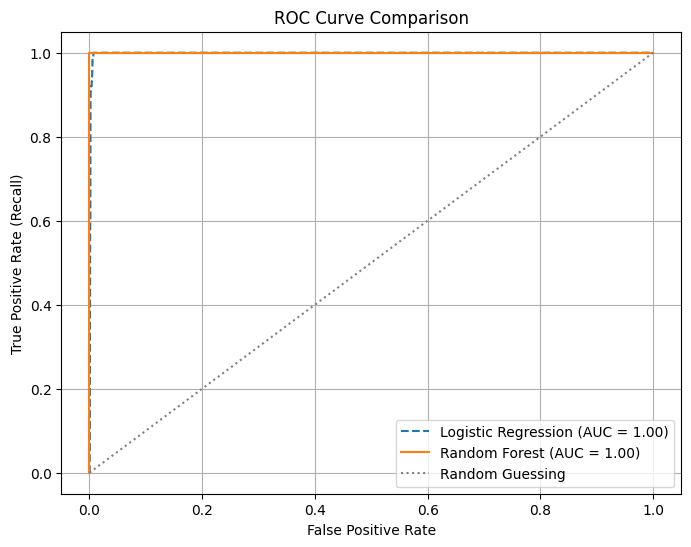

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_scores_lr = log_reg.predict_proba(X_test)[:, 1]
y_scores_rf = rf_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
auc_lr = roc_auc_score(y_test, y_scores_lr)

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)
auc_rf = roc_auc_score(y_test, y_scores_rf)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, linestyle='--', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, linestyle='-', label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle=':', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
print(type(shap_values))         # should be a list
print(len(shap_values))          # should be 2 for binary classification
print(shap_values[1].shape)      # should be (len(X_test), number_of_features)
print(X_test.shape)


<class 'numpy.ndarray'>
19133
(30, 2)
(19133, 30)


In [39]:
import shap

# Ensure correct column order
X_test = X_test[rf_clf.feature_names_in_]

# Reinitialize explainer
explainer = shap.TreeExplainer(rf_clf)

# Compute SHAP values on full test set
shap_values = explainer.shap_values(X_test)

# Now, check shape again
print(f"shap_values[1].shape: {shap_values[1].shape}")
print(f"X_test.shape: {X_test.shape}")


shap_values[1].shape: (30, 2)
X_test.shape: (19133, 30)


In [42]:
print(f"shap_values type: {type(shap_values)}")
print(f"len(shap_values): {len(shap_values)}")
print(f"shap_values[0].shape: {shap_values[0].shape}")
print(f"shap_values[1].shape: {shap_values[1].shape}")
print(f"X_test.shape: {X_test.shape}")


shap_values type: <class 'numpy.ndarray'>
len(shap_values): 19133
shap_values[0].shape: (30, 2)
shap_values[1].shape: (30, 2)
X_test.shape: (19133, 30)


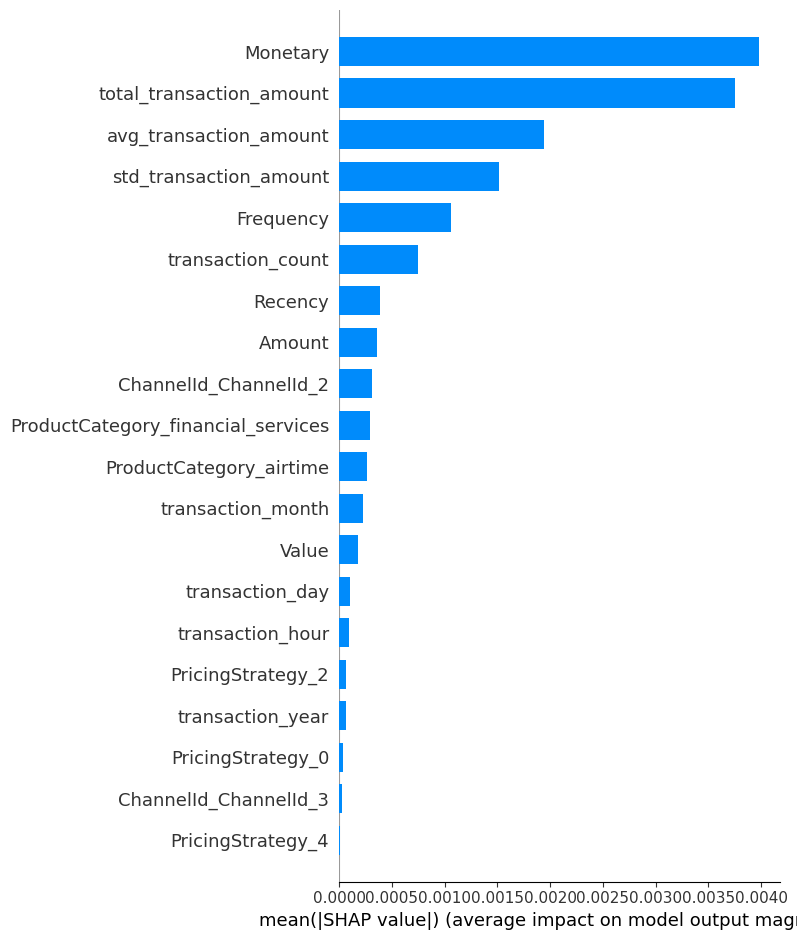

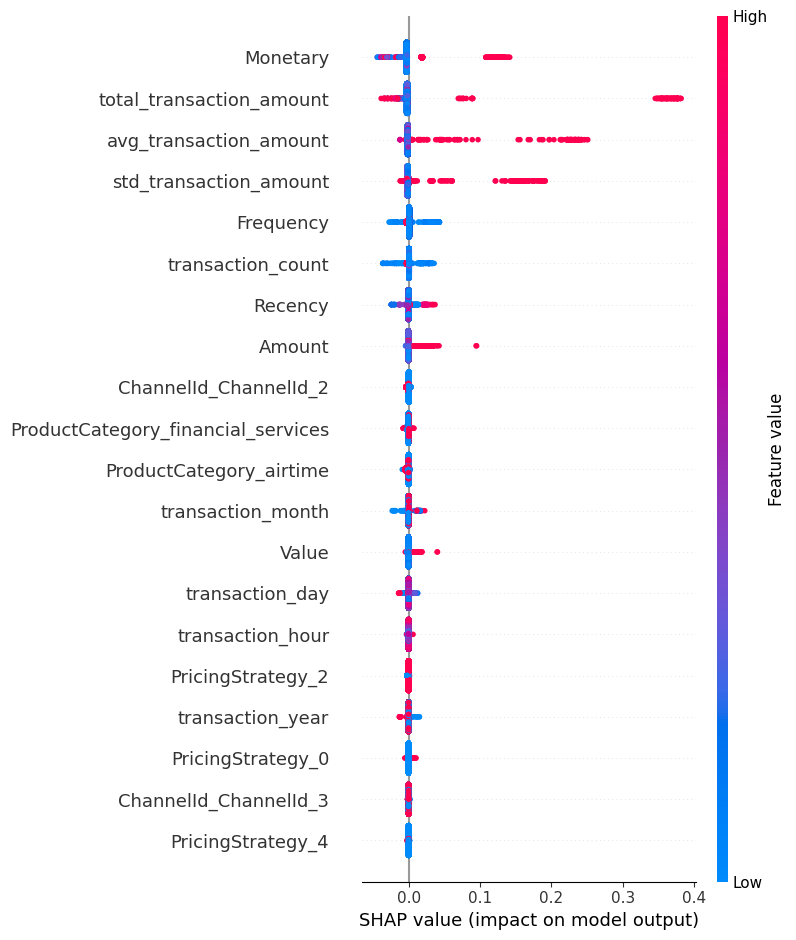

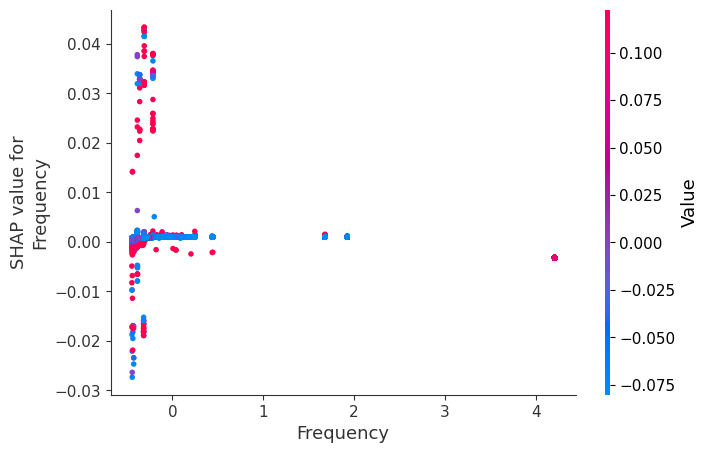

In [45]:
# Combine the per-sample (30, 2) arrays into a single (19133, 30, 2) array
import numpy as np


shap_array = np.stack(shap_values)  # shape: (19133, 30, 2)

# We want the shap values for class 1 (column index 1)
shap_vals_cleaned = shap_array[:, :, 1]  # shape: (19133, 30)

# Now plot
shap.summary_plot(shap_vals_cleaned, X_test, plot_type="bar")
shap.summary_plot(shap_vals_cleaned, X_test)

# Dependence plot
top_feature = X_test.columns[shap_vals_cleaned.mean(0).argmax()]
shap.dependence_plot(top_feature, shap_vals_cleaned, X_test)
